In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Reading csv file
laptop = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Laptop Price Prediction/laptop.csv")

In [ ]:
# Fetching first five rows
laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
# Fetching information about data
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
# Fetching statistical data
laptop.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [ ]:
# Fetching column names
laptop.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

# Exploratory Data Analysis

In [ ]:
# Unique company names and their counts
laptop['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

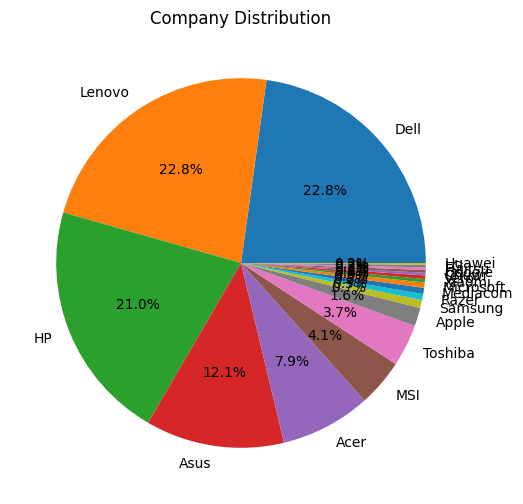

In [ ]:
# Company column analysis

company_counts = laptop['Company'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(company_counts, labels=company_counts.index, autopct='%1.1f%%')
plt.title('Company Distribution')
plt.show()


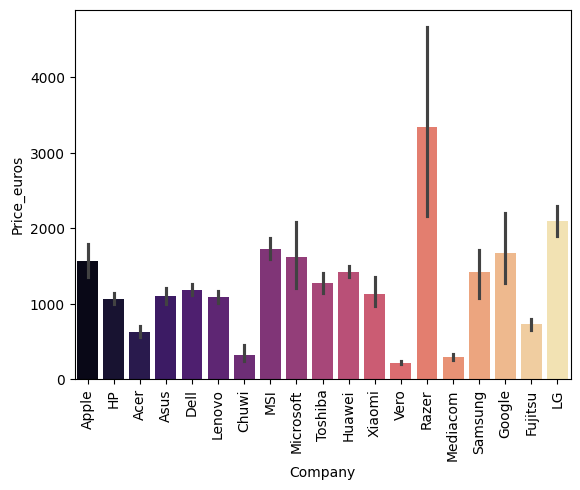

In [ ]:
# comparing company and their average prices

import matplotlib.pyplot as plt
sns.barplot(x = 'Company', y = 'Price_euros', data = laptop, hue = 'Company', palette = 'magma')
plt.xticks(rotation = 90)
plt.show()


In [ ]:
# Unique TypeNames and their counts
laptop['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

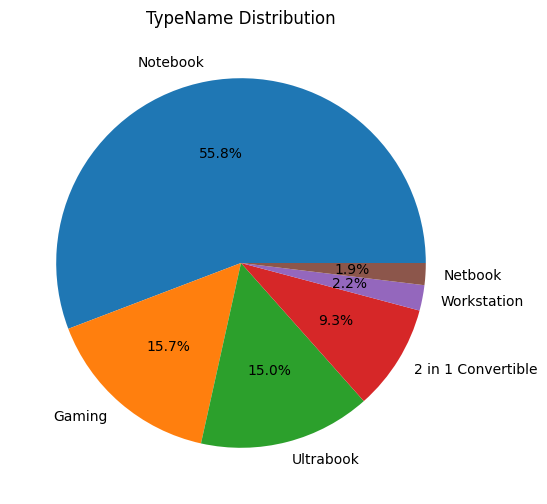

In [ ]:
# TypeName column analysis

type_counts = laptop['TypeName'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('TypeName Distribution')
plt.show()


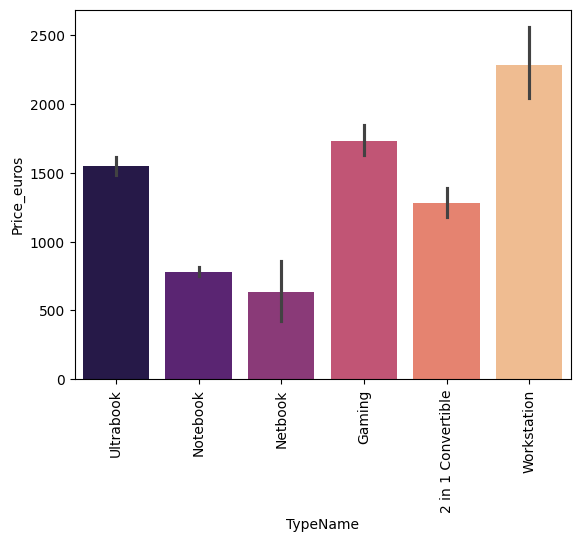

In [ ]:
# comparing typename and average price_euros

import matplotlib.pyplot as plt
sns.barplot(x = 'TypeName', y = 'Price_euros', data = laptop, hue = 'TypeName', palette = 'magma')
plt.xticks(rotation = 90)
plt.show()


In [ ]:
# Unique Inches values and their counts
laptop['Inches'].value_counts()

Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64

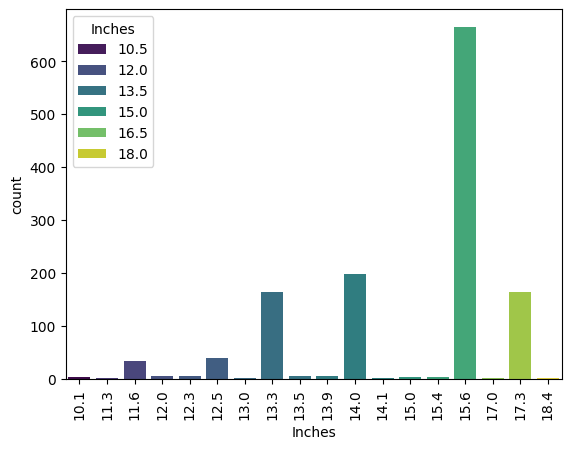

In [ ]:
# countplot of inches column

sns.countplot(x = 'Inches', data = laptop, hue = 'Inches', palette = 'viridis')
plt.xticks(rotation = 90)
plt.show()


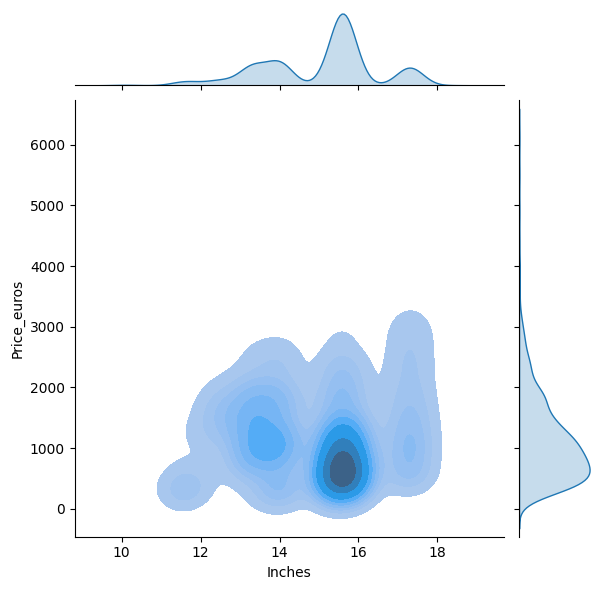

In [ ]:
# Price density with inches

sns.jointplot(x= 'Inches', y = 'Price_euros', data = laptop, kind = 'kde', fill = True)

In [ ]:
# Unique Cpu names and their counts
laptop['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

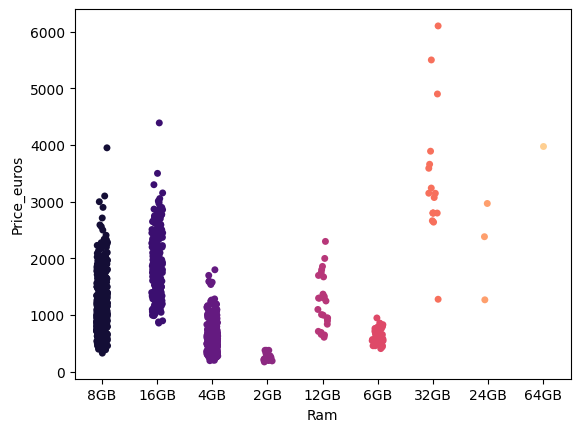

In [ ]:
# Analyzing ram and price

sns.stripplot(x='Ram', y='Price_euros', hue = 'Ram', palette = 'magma', data=laptop)
plt.show()


# Data Preprocessing

In [ ]:
# Checking null values
laptop.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [ ]:
# checking duplicate values
laptop.duplicated().sum()

0

In [ ]:
# Dropping columns which are of no use for our project
laptop.drop(['laptop_ID', 'Product'], axis = 1, inplace = True)

laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
# Removing kg from weight column and changing its datatype to float
laptop['Weight'] = laptop['Weight'].astype(str).str.replace('kg', '').astype('float64')

laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


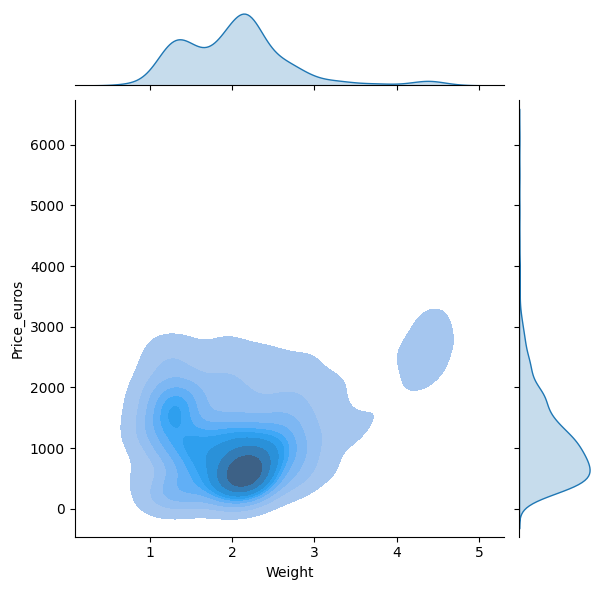

In [ ]:
# Weight analysis with price
sns.jointplot(x = 'Weight', y = 'Price_euros', data = laptop, kind ='kde', fill = True)

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.4 MB/s eta 0:00:00


In [ ]:
# target encoding on Company, TypeName, ScreenResolution, Cpu, Ram, Memory, Gpu, OpSys columns

import category_encoders as ce

target_cols = ['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys']

for col in target_cols:
    # Create a target encoder object
    target_encoder = ce.TargetEncoder(cols=[col])

    # Fit the encoder on the data
    target_encoder.fit(laptop[col], laptop['Price_euros'])

    # Transform the data
    laptop[col] = target_encoder.transform(laptop[col])

laptop.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1354.946403,1548.230347,13.3,1233.726096,1167.012989,1180.812940,709.306664,1271.906188,1331.382791,1.37,1339.69
1,1354.946403,1548.230347,13.3,1109.404020,1110.230008,1180.812940,1053.856700,1105.269495,1331.382791,1.34,898.94
2,1067.774854,782.078624,15.6,1156.530256,918.467851,1180.812940,1229.387451,1141.168434,593.304650,1.86,575.00
3,1354.946403,1548.230347,15.4,1353.848766,1307.629540,1936.771138,1860.770145,1307.629540,1331.382791,1.83,2537.45
4,1354.946403,1548.230347,13.3,1233.726096,1236.900172,1180.812940,1229.387451,1236.900172,1331.382791,1.37,1803.60


<Axes: >

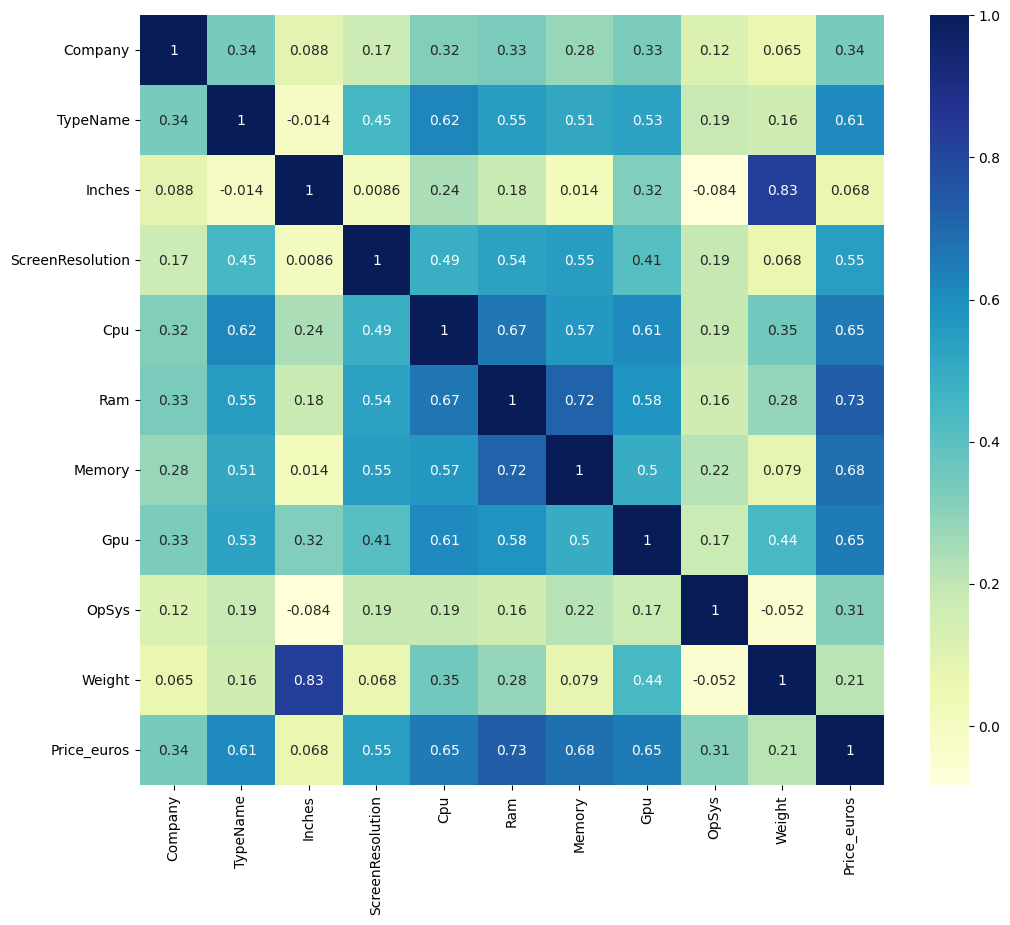

In [ ]:
# Correlation analysis
plt.figure(figsize=(12, 10))
sns.heatmap(laptop.corr(numeric_only = True) , annot = True, cmap = 'YlGnBu')

In [ ]:
# Dividing the data into into input and output variables
X = laptop.drop(['Price_euros'], axis = 1)
y = laptop['Price_euros']

In [ ]:
# Performing standard scaling to put all the numerical features on a similar scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
# Dividing X and y into train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101)

In [ ]:
# Importing libraries for evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

# Modeling

### GradientBoostingRegressor

In [ ]:
# Training a model
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(max_depth=6, n_estimators=50)
gb.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=6, n_estimators=50)

In [ ]:
# Training Accuracy

# Predictions on the train det
gb_train_pred = gb.predict(X_train)

# Evaluation
gb_train_rmse = np.sqrt(mean_squared_error(y_train, gb_train_pred))
gb_train_r2 = r2_score(y_train, gb_train_pred)

print('Training RMSE:', gb_train_rmse)
print('Training R2 Score:', gb_train_r2)

Training RMSE: 115.26148677775117
Training R2 Score: 0.973088440219134


In [ ]:
# Testing Accuracy

# Predictions on the train det
gb_test_pred = gb.predict(X_test)

# Evaluation
gb_test_rmse = np.sqrt(mean_squared_error(y_test, gb_test_pred))
gb_test_r2 = r2_score(y_test, gb_test_pred)

print('Testing RMSE:', gb_test_rmse)
print('Testing R2 Score:', gb_test_r2)

Testing RMSE: 247.21934687584928
Testing R2 Score: 0.8687815802001442


### Grid Search on GradientBoostingRegressor

In [ ]:
# performing grid search on Gradient Boosting Regressor

from sklearn.model_selection import GridSearchCV

# Defining the grid of hyperparameters to search
grid = {
    'max_depth': [4, 5, 6, 7, 8],
    'n_estimators': [30, 40, 50, 60, 70, 80]
}

# Performing grid search
grid_search = GridSearchCV(gb, grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Training the model with the best hyperparameters
gb_best = GradientBoostingRegressor(**best_params)
gb_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=80)

In [ ]:
# Evaluate the model on the train set

# Predictions on the train det
gb_best_train_pred = gb_best.predict(X_train)

# Evaluation
gb_best_train_rmse = np.sqrt(mean_squared_error(y_train, gb_best_train_pred))
gb_best_train_r2 = r2_score(y_train, gb_best_train_pred)

print('Training RMSE:', gb_best_train_rmse)
print('Training R2 Score:', gb_best_train_r2)

Training RMSE: 157.04554392316288
Training R2 Score: 0.95004008722649


In [ ]:
# Evaluate the model on the test set

# Predictions on the test det
gb_best_test_pred = gb_best.predict(X_test)

#Evaluation
gb_best_test_rmse = np.sqrt(mean_squared_error(y_test, gb_best_test_pred))
gb_best_test_r2 = r2_score(y_test, gb_best_test_pred)

print('Test RMSE:', gb_best_test_rmse)
print('Test R2 Score:', gb_best_test_r2)


Test RMSE: 239.51659054221443
Test R2 Score: 0.8768310906152827


### CatBoostRegressor

In [ ]:
# Installing catboost
!!pip install catboost
from catboost import CatBoostRegressor

In [ ]:
# cat boost regressor


# Define the model
cat = CatBoostRegressor(iterations= 945,
                        learning_rate=0.04,
                        depth= 7,
                        loss_function='RMSE',
                        eval_metric='RMSE',
                        l2_leaf_reg=3)

# Fit the model
cat.fit(X_train, y_train,
         eval_set=(X_test, y_test),
         verbose=200,
         plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 685.7757396	test: 665.5422304	best: 665.5422304 (0)	total: 49.1ms	remaining: 46.3s
200:	learn: 194.5979186	test: 254.6567509	best: 254.6567509 (200)	total: 315ms	remaining: 1.16s
400:	learn: 142.3202610	test: 236.7563182	best: 236.7563182 (400)	total: 685ms	remaining: 929ms
600:	learn: 114.2686598	test: 231.4044491	best: 231.4044491 (600)	total: 1.18s	remaining: 676ms
800:	learn: 95.8847989	test: 228.1728942	best: 228.1420868 (799)	total: 1.52s	remaining: 274ms
944:	learn: 86.4331580	test: 227.5901130	best: 227.3123397 (902)	total: 1.85s	remaining: 0us

bestTest = 227.3123397
bestIteration = 902

Shrink model to first 903 iterations.


In [ ]:
# Training Accuracy

# Predictions for the train dataset
cat_train_pred = cat.predict(X_train)

# evaluation
cat_train_rmse = np.sqrt(mean_squared_error(y_train, cat_train_pred))
cat_train_r2 = r2_score(y_train, cat_train_pred)

print('Training RMSE:', cat_train_rmse)
print('Training r2_score:', cat_train_r2)

Training RMSE: 88.85217685554682
Training r2_score: 0.9840078601094753


In [ ]:
# Testing Accuracy

# Predictions on the train det
cat_test_pred = cat.predict(X_test)

# Evaluation
cat_test_rmse = np.sqrt(mean_squared_error(y_test, cat_test_pred))
cat_test_r2 = r2_score(y_test, cat_test_pred)

print('Testing RMSE:', cat_test_rmse)
print('Testing R2 Score:', cat_test_r2)

Testing RMSE: 227.31234136616325
Testing R2 Score: 0.8890631258634196


### grid search on catboost regressor

In [ ]:
# grid search on catboost regressor
from sklearn.model_selection import GridSearchCV


# Define the grid of hyperparameters to search
grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.03, 0.04, 0.05],
    'depth': [6, 7, 8],
}

# Perform grid search
grid_search = GridSearchCV(cat, grid, cv=3)
grid_search.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
0:	learn: 660.9560625	total: 5.19ms	remaining: 514ms
1:	learn: 641.4094966	total: 7.87ms	remaining: 385ms
2:	learn: 624.2205986	total: 10ms	remaining: 324ms
3:	learn: 606.9742325	total: 12.3ms	remaining: 295ms
4:	learn: 590.6597660	total: 14.5ms	remaining: 275ms
5:	learn: 575.6823567	total: 16.6ms	remaining: 261ms
6:	learn: 559.6071591	total: 18.8ms	remaining: 250ms
7:	learn: 544.2995180	total: 21.4ms	remaining: 246ms
8:	learn: 530.6437029	total: 23.7ms	remaining: 239ms
9:	learn: 517.2379237	total: 25.8ms	remaining: 233ms
10:	learn: 504.5844506	total: 28.1ms	remaining: 227ms
11:	learn: 491.6850275	total: 30.3ms	remaining: 222ms
12:	learn: 480.5385954	total: 32.4ms	remaining: 217ms
13:	learn: 470.4084924	total: 34.5ms	remaining: 212ms
14:	learn: 460.6747108	total: 36.7ms	remaining: 208ms
15:	learn: 450.6274317	total: 38.9ms	remaining: 204ms
16:	learn: 441.3214348	total: 41ms	remaining: 200ms
17:	learn: 432.1004527	total: 43.6ms	remainin

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x7ec9a9064910>,
             param_grid={'depth': [6, 7, 8], 'iterations': [100, 200, 300],
                         'learning_rate': [0.03, 0.04, 0.05]})

In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
cat_best = CatBoostRegressor(**best_params)
cat_best.fit(X_train, y_train)


0:	learn: 682.0117414	total: 1.03ms	remaining: 309ms
1:	learn: 661.2231025	total: 2.64ms	remaining: 393ms
2:	learn: 642.1407921	total: 3.85ms	remaining: 381ms
3:	learn: 623.7044611	total: 5.02ms	remaining: 372ms
4:	learn: 606.8843234	total: 6.27ms	remaining: 370ms
5:	learn: 591.0824657	total: 7.48ms	remaining: 367ms
6:	learn: 576.2763524	total: 8.55ms	remaining: 358ms
7:	learn: 561.2490035	total: 9.78ms	remaining: 357ms
8:	learn: 546.6531008	total: 10.9ms	remaining: 353ms
9:	learn: 533.1017359	total: 12ms	remaining: 348ms
10:	learn: 520.7756429	total: 13.1ms	remaining: 343ms
11:	learn: 508.8236269	total: 14.3ms	remaining: 342ms
12:	learn: 497.7889231	total: 15.3ms	remaining: 339ms
13:	learn: 488.5513958	total: 16.4ms	remaining: 335ms
14:	learn: 477.1686364	total: 17.5ms	remaining: 333ms
15:	learn: 467.0290641	total: 18.5ms	remaining: 329ms
16:	learn: 457.8461032	total: 19.8ms	remaining: 329ms
17:	learn: 448.9490516	total: 21.1ms	remaining: 330ms
18:	learn: 441.6460743	total: 22.2ms	rem

In [ ]:
# Evaluate the model on the train set

# Predictions on the train det
cat_best_train_pred = cat_best.predict(X_train)

# Evaluation
cat_best_train_rmse = np.sqrt(mean_squared_error(y_train, cat_best_train_pred))
cat_best_train_r2 = r2_score(y_train, cat_best_train_pred)

print('Train RMSE:', cat_best_train_rmse)
print('Train R2 Score:', cat_best_train_r2)

Train RMSE: 162.8408359049983
Train R2 Score: 0.9462848143011171


In [ ]:
# Evaluate the model on the test set

# Predictions on the test det
cat_best_test_pred = cat_best.predict(X_test)

#Evaluation
cat_best_test_rmse = np.sqrt(mean_squared_error(y_test, cat_best_test_pred))
cat_best_test_r2 = r2_score(y_test, cat_best_test_pred)

print('Test RMSE:', cat_best_test_rmse)
print('Test R2 Score:', cat_best_test_r2)


Test RMSE: 245.36902648860425
Test R2 Score: 0.8707384457375378


# Result analysis

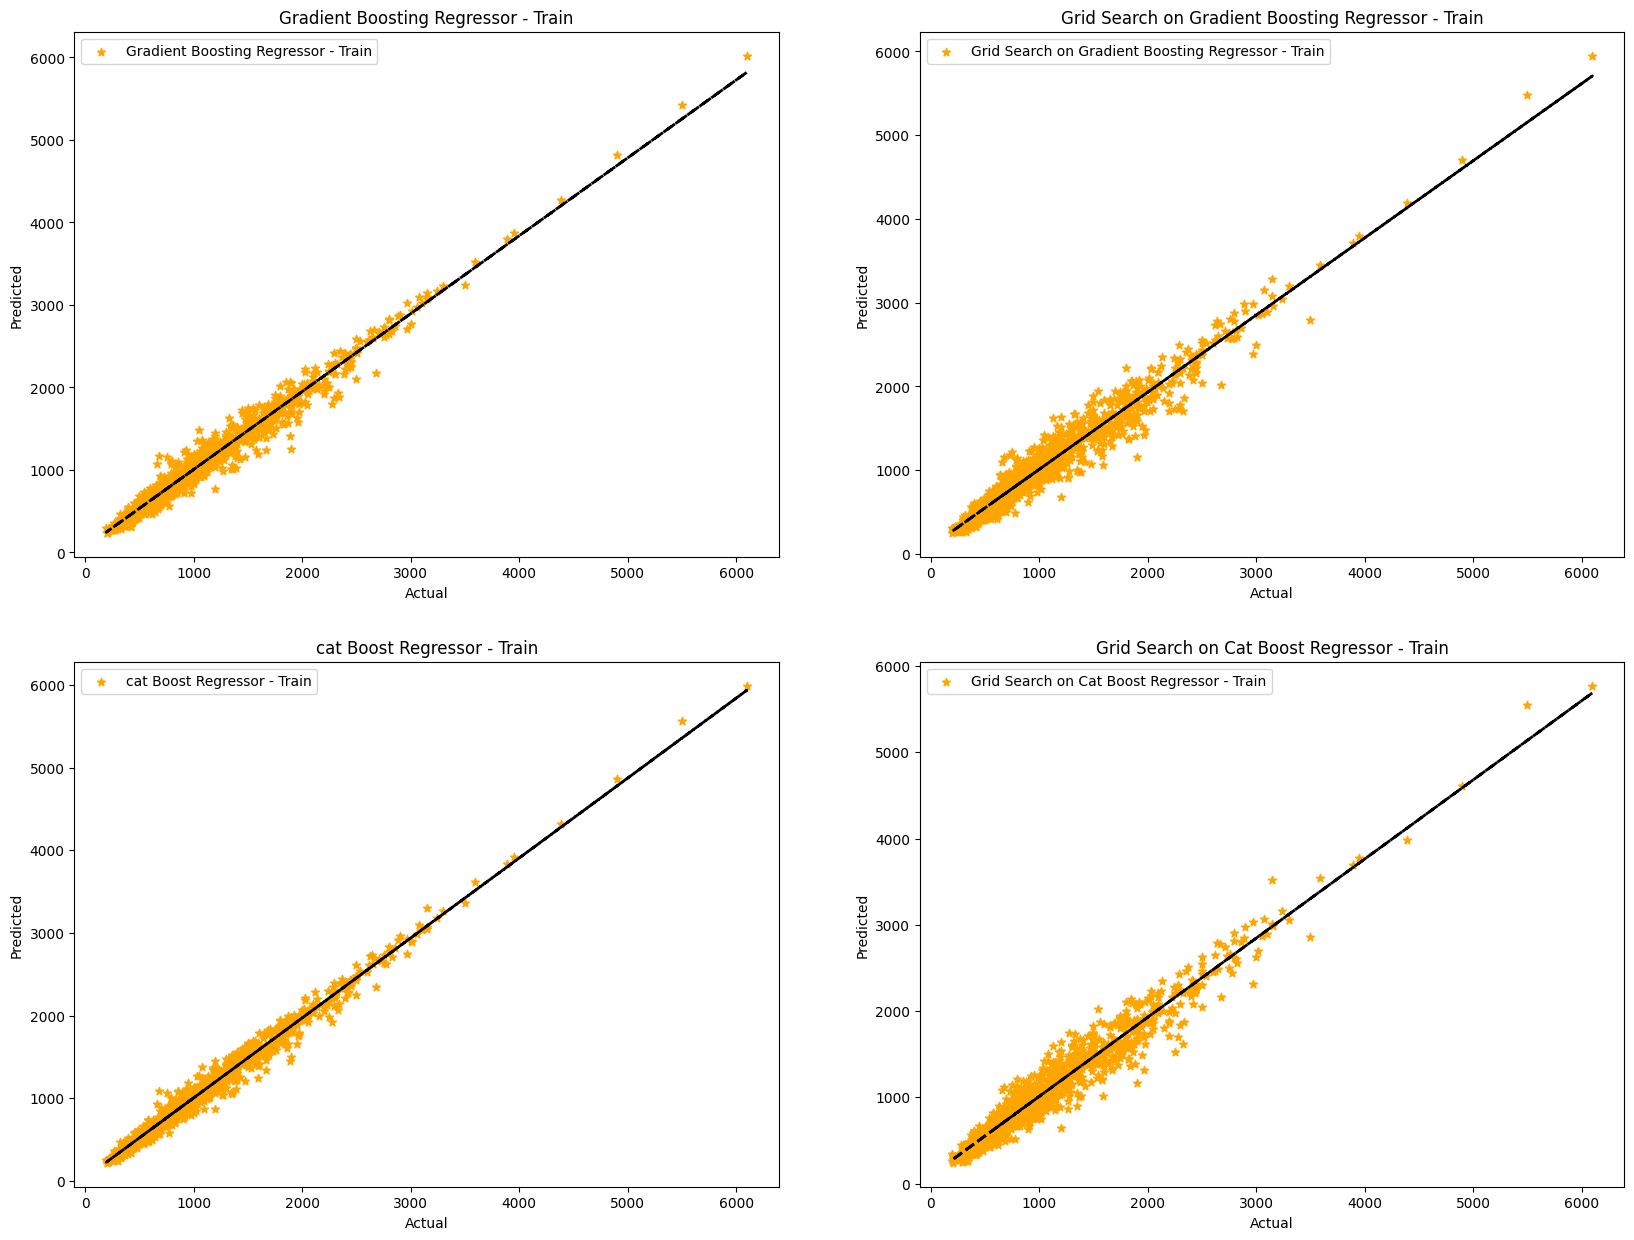

In [ ]:
# Result Analysis of training data

# Create a figure with 3 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Scatter plot for Gradient Boosting Regressor
axes[0, 0].scatter(y_train, gb_train_pred, marker = '*' , c = 'orange', label = 'Gradient Boosting Regressor - Train')
axes[0, 0].set_title('Gradient Boosting Regressor - Train')
axes[0, 0].set_xlabel('Actual')
axes[0, 0].set_ylabel('Predicted')
axes[0, 0].legend()

# Regression line for Gradient Boosting Regressor
m, b = np.polyfit(y_train, gb_train_pred, 1)
axes[0, 0].plot(y_train, m * y_train + b, linestyle='--', color='black', linewidth=2)

# Scatter plot for Grid Search on Gradient Boosting Regressor
axes[0, 1].scatter(y_train, gb_best_train_pred, marker = '*' , c = 'orange', label = 'Grid Search on Gradient Boosting Regressor - Train')
axes[0, 1].set_title('Grid Search on Gradient Boosting Regressor - Train')
axes[0, 1].set_xlabel('Actual')
axes[0, 1].set_ylabel('Predicted')
axes[0, 1].legend()

# Regression line for Grid Search on Gradient Boosting Regressor
m, b = np.polyfit(y_train, gb_best_train_pred, 1)
axes[0, 1].plot(y_train, m * y_train + b, linestyle='--', color='black', linewidth=2)

# Scatter plot for Cat Boost Regressor
axes[1, 0].scatter(y_train, cat_train_pred, marker = '*' , c = 'orange', label = 'cat Boost Regressor - Train')
axes[1, 0].set_title('cat Boost Regressor - Train')
axes[1, 0].set_xlabel('Actual')
axes[1, 0].set_ylabel('Predicted')
axes[1, 0].legend()

# Regression line for Cat Boost Regressor
m, b = np.polyfit(y_train, cat_train_pred, 1)
axes[1, 0].plot(y_train, m * y_train + b, linestyle='--', color='black', linewidth=2)

# Scatter plot for Grid Search on cat Boost Regressor
axes[1, 1].scatter(y_train, cat_best_train_pred, marker = '*' , c = 'orange', label = 'Grid Search on Cat Boost Regressor - Train')
axes[1, 1].set_title('Grid Search on Cat Boost Regressor - Train')
axes[1, 1].set_xlabel('Actual')
axes[1, 1].set_ylabel('Predicted')
axes[1, 1].legend()

# Regression line for Grid Search on Cat Boost Regressor
m, b = np.polyfit(y_train, cat_best_train_pred, 1)
axes[1, 1].plot(y_train, m * y_train + b, linestyle='--', color='black', linewidth=2)

# Show the plot
plt.show()


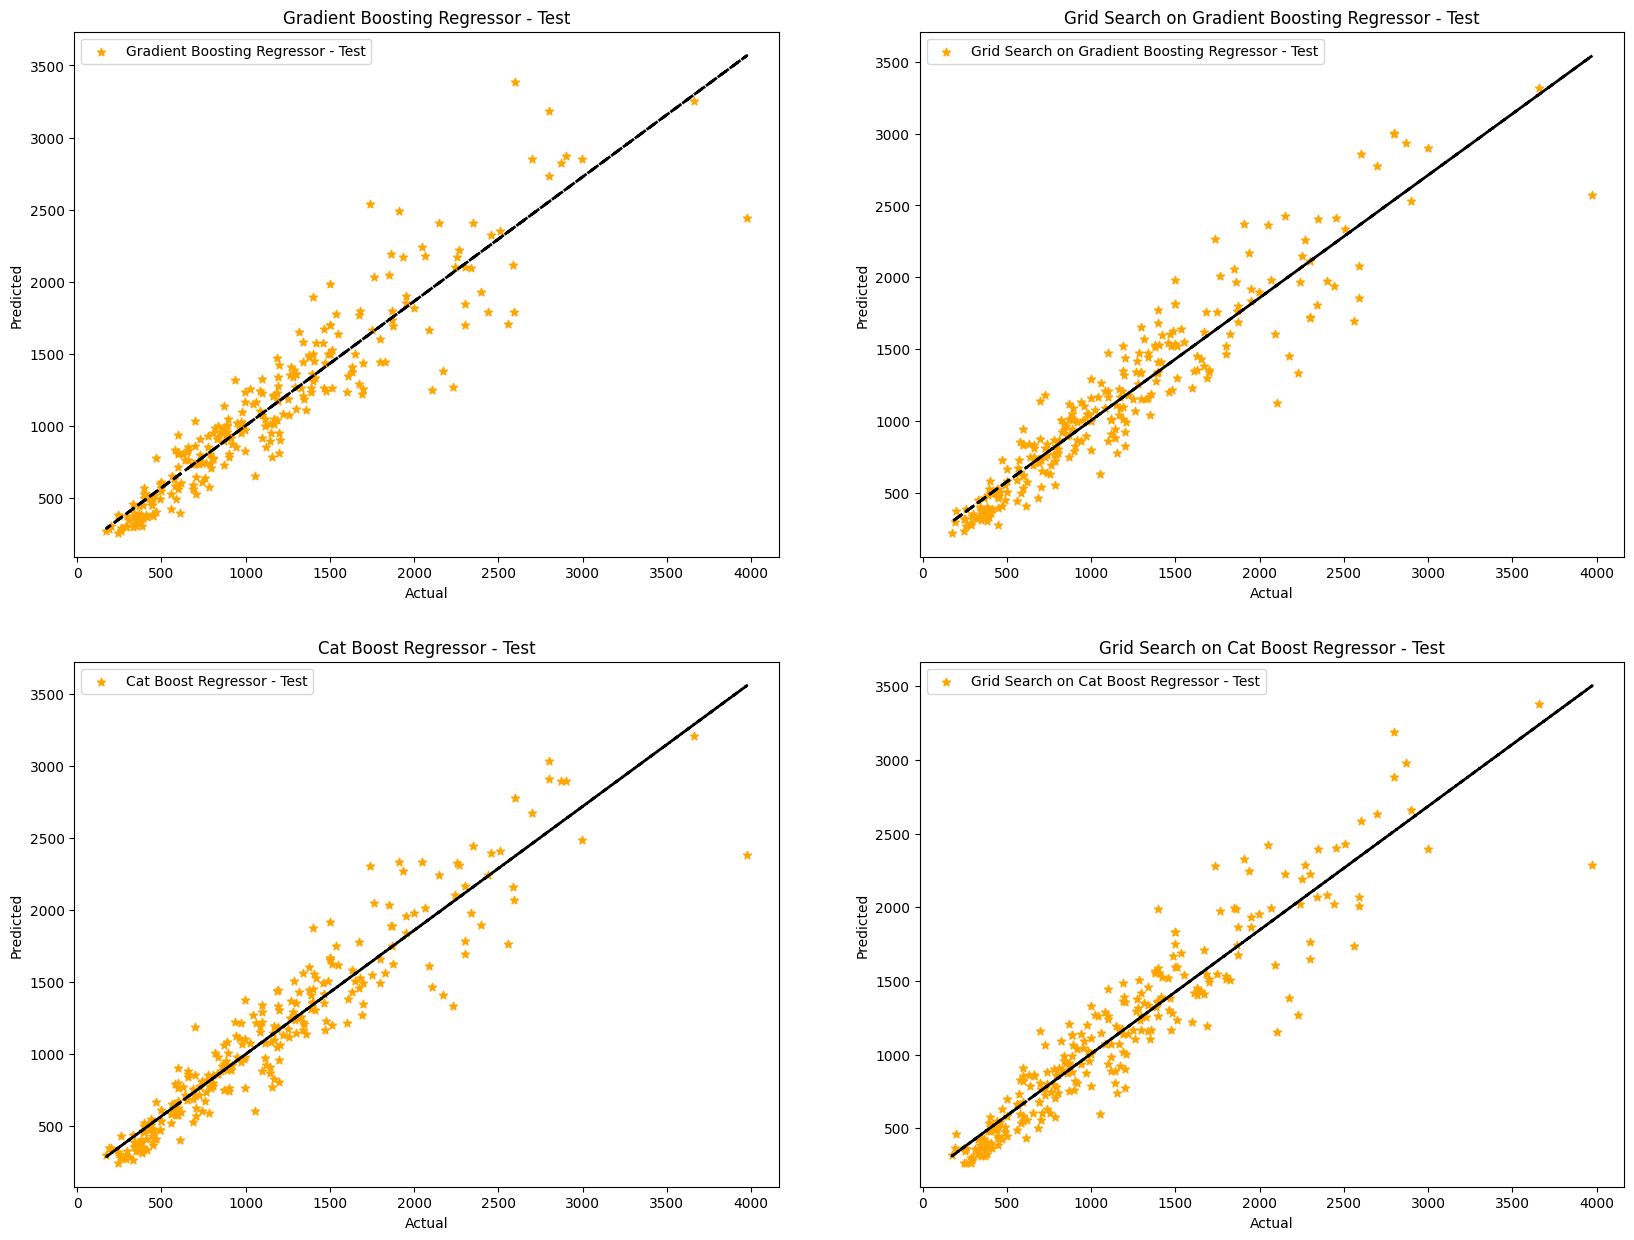

In [ ]:
# Result Analysis of Testing Data

# Create a figure with 3 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Scatter plot for Gradient Boosting Regressor
axes[0, 0].scatter(y_test, gb_test_pred, marker = '*' , c = 'orange', label = 'Gradient Boosting Regressor - Test')
axes[0, 0].set_title('Gradient Boosting Regressor - Test')
axes[0, 0].set_xlabel('Actual')
axes[0, 0].set_ylabel('Predicted')
axes[0, 0].legend()

# Regression line for Gradient Boosting Regressor
m, b = np.polyfit(y_test, gb_test_pred, 1)
axes[0, 0].plot(y_test, m * y_test + b, linestyle='--', color='black', linewidth=2)

# Scatter plot for Grid Search on Gradient Boosting Regressor
axes[0, 1].scatter(y_test, gb_best_test_pred, marker = '*' , c = 'orange', label = 'Grid Search on Gradient Boosting Regressor - Test')
axes[0, 1].set_title('Grid Search on Gradient Boosting Regressor - Test')
axes[0, 1].set_xlabel('Actual')
axes[0, 1].set_ylabel('Predicted')
axes[0, 1].legend()

# Regression line for Grid Search on Gradient Boosting Regressor
m, b = np.polyfit(y_test, gb_best_test_pred, 1)
axes[0, 1].plot(y_test, m * y_test + b, linestyle='--', color='black', linewidth=2)


# Scatter plot for Cat Boost Regressor
axes[1, 0].scatter(y_test, cat_test_pred, marker = '*' , c = 'orange', label = 'Cat Boost Regressor - Test')
axes[1, 0].set_title('Cat Boost Regressor - Test')
axes[1, 0].set_xlabel('Actual')
axes[1, 0].set_ylabel('Predicted')
axes[1, 0].legend()

# Regression line for  Cat Boost Regressor
m, b = np.polyfit(y_test, cat_test_pred, 1)
axes[1, 0].plot(y_test, m * y_test + b, linestyle='--', color='black', linewidth=2)

# Scatter plot for Grid Search on  Cat Boost Regressor
axes[1, 1].scatter(y_test, cat_best_test_pred, marker = '*' , c = 'orange', label = 'Grid Search on Cat Boost Regressor - Test')
axes[1, 1].set_title('Grid Search on Cat Boost Regressor - Test')
axes[1, 1].set_xlabel('Actual')
axes[1, 1].set_ylabel('Predicted')
axes[1, 1].legend()

# Regression line for Grid Search on Cat Boost Regressor
m, b = np.polyfit(y_test, cat_best_test_pred, 1)
axes[1, 1].plot(y_test, m * y_test + b, linestyle='--', color='black', linewidth=2)

# Show the plot
plt.show()
